# LV1 – Obrada teksta i Part-of-Speech (POS) označavanje
### Laboratorijska vježba 1
**Tema:** Osnove obrade prirodnog jezika pomoću biblioteka spaCy i NLTK

Ovaj notebook sadrži teorijski uvod, osnovne korake obrade teksta te zadatke za samostalni rad. Studenti mogu birati žele li koristiti *spaCy* ili *NLTK* biblioteku pri rješavanju zadataka.

## Ciljevi vježbe
- Upoznati osnovne korake obrade prirodnog jezika (NLP).
- Primijeniti biblioteke **spaCy** i **NLTK** na obradu teksta.
- Razumjeti i implementirati procese tokenizacije, uklanjanja zaustavnih riječi, lematizacije i POS označavanja.
- Razviti sposobnost analize i interpretacije rezultata obrade teksta.

## 1. Instalacija potrebnih biblioteka

In [1]:
!pip install spacy nltk matplotlib pandas

!python -m spacy download en_core_web_sm

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 109.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## 2. Tokenizacija
**Opis:** Tokenizacija je proces razdvajanja teksta na manje jedinice – tokene (riječi, interpunkcijske znakove itd.).

U nastavku su prikazana dva načina tokenizacije: pomoću *spaCy* i pomoću *NLTK*.

In [12]:
nlp = spacy.load('en_core_web_sm')
text = 'Natural Language Processing enables computers to understand human language.'
doc = nlp(text)
for token in doc:
    print(token.text)

Natural
Language
Processing
enables
computers
to
understand
human
language
.


In [13]:
nltk.download('punkt')
nltk.download('punkt_tab')
text = 'Natural Language Processing enables computers to understand human language.'
tokens = word_tokenize(text)
print(tokens)

['Natural', 'Language', 'Processing', 'enables', 'computers', 'to', 'understand', 'human', 'language', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Zadatak 1
Upiši vlastiti tekst i izvrši tokenizaciju pomoću obje biblioteke.

In [15]:
my_text = "This is first laboratory exrcise in natural language processing."
my_doc = nlp(my_text);
for token in my_doc:
  print(token.text)

This
is
first
laboratory
exrcise
in
natural
language
processing
.


## 3. Uklanjanje zaustavnih riječi (Stopwords)
Zaustavne riječi su česte riječi koje ne doprinose značenju teksta (npr. the, is, in...).

In [21]:
doc = nlp(text)
filtered_spacy = [token.text for token in doc if not token.is_stop]
print(filtered_spacy)

['Natural', 'Language', 'Processing', 'enables', 'computers', 'understand', 'human', 'language', '.']


In [22]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_nltk = [word for word in tokens if word.lower() not in stop_words]
print(filtered_nltk)

['Natural', 'Language', 'Processing', 'enables', 'computers', 'understand', 'human', 'language', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Zadatak 2
Ukloni zaustavne riječi iz vlastitog teksta pomoću obje biblioteke.

In [23]:
my_doc = nlp(my_text)
filtered_my_spacy = [token.text for token in my_doc  if not token.is_stop]
print(filtered_my_spacy)

['laboratory', 'exrcise', 'natural', 'language', 'processing', '.']


## 4. Lematizacija
Lematizacija svodi riječi na osnovni oblik (lemu).

In [24]:
#Primjer: Lemmatizacija sa spaCy
for token in doc:
    print(f'{token.text:15} → {token.lemma_}')

Natural         → Natural
Language        → Language
Processing      → processing
enables         → enable
computers       → computer
to              → to
understand      → understand
human           → human
language        → language
.               → .


In [25]:
#Primjer: Lemmatizacija s NLTK
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
pos_tags = pos_tag(tokens)
def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return wordnet.NOUN
lemmas = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
print(lemmas)

['Natural', 'Language', 'Processing', 'enable', 'computer', 'to', 'understand', 'human', 'language', '.']


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Zadatak 3
Primijeni lematizaciju na vlastiti tekst i usporedi rezultate između spaCy i NLTK.

In [26]:
for token in my_doc:
    print(f'{token.text:15} → {token.lemma_}')

This            → this
is              → be
first           → first
laboratory      → laboratory
exrcise         → exrcise
in              → in
natural         → natural
language        → language
processing      → processing
.               → .


In [31]:
tokens = word_tokenize(my_text)
lemmatizer = WordNetLemmatizer()
pos_tags = pos_tag(tokens)
lemmas = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
print(lemmas)

['This', 'be', 'first', 'laboratory', 'exrcise', 'in', 'natural', 'language', 'processing', '.']


## 5. POS (Part-of-Speech) označavanje
POS označavanje dodjeljuje gramatičku ulogu svakoj riječi (imenica, glagol, pridjev, prilog...).

In [32]:
for token in doc:
    print(f'{token.text:15} → {token.pos_:6} ({token.tag_})')

Natural         → PROPN  (NNP)
Language        → PROPN  (NNP)
Processing      → NOUN   (NN)
enables         → VERB   (VBZ)
computers       → NOUN   (NNS)
to              → PART   (TO)
understand      → VERB   (VB)
human           → ADJ    (JJ)
language        → NOUN   (NN)
.               → PUNCT  (.)


In [33]:
pos_tags = pos_tag(tokens)
for word, tag in pos_tags:
    print(f'{word:15} → {tag}')

This            → DT
is              → VBZ
first           → JJ
laboratory      → JJ
exrcise         → NN
in              → IN
natural         → JJ
language        → NN
processing      → NN
.               → .


### Zadatak 4
Izdvoji sve imenice i glagole iz svog teksta pomoću jedne od biblioteka.

In [34]:
for token in my_doc:
      print(f'{token.text:15} → {token.pos_:6} ({token.tag_})')

This            → PRON   (DT)
is              → AUX    (VBZ)
first           → ADJ    (JJ)
laboratory      → NOUN   (NN)
exrcise         → NOUN   (NN)
in              → ADP    (IN)
natural         → ADJ    (JJ)
language        → NOUN   (NN)
processing      → NOUN   (NN)
.               → PUNCT  (.)


## 6. Zadaci

## Zadatak 1: Usporedi dva teksta po učestalosti riječi

**Opis:**  
Analiziraj dva različita teksta (npr. jedan o sportu, drugi o tehnologiji).  
Nakon što provedeš tokenizaciju, uklanjanje zaustavnih riječi i lematizaciju, potrebno je:  
- pronaći 10 najčešćih imenica u svakom tekstu,  
- usporediti liste dobivenih imenica,  
- zaključiti o čemu se govori u svakom tekstu.

**Cilj:**  
Razumjeti kako se analiza frekvencije riječi može koristiti za prepoznavanje teme teksta.

**Upute:**  
1. Učitaj dva različita teksta (mogu biti dvije rečenice, dva odlomka ili datoteke).  
2. Obradi svaki tekst (tokenizacija → čišćenje → lematizacija → POS tagging).  
3. Izdvoji samo riječi označene kao NOUN (imenice).  
4. Prebroji pojavljivanja i prikaži 5 najčešćih.  
5. Zaključi koja je tema svakog teksta.

In [37]:
text_sport = """
The team played an intense match last night, delivering one of their strongest performances this season.
Throughout the match, the team demonstrated exceptional teamwork, discipline, and determination.
The coach repeatedly emphasized how important teamwork was for maintaining control during the most difficult moments of the match.
Several players mentioned that the team had trained specifically to improve their teamwork and communication, which clearly paid off.
Fans celebrated loudly after the match, recognizing that the team’s victory was crucial for improving their position in the championship.
During the press conference, the coach praised the players for their strategy, dedication, and ability to adapt as the match progressed.
He highlighted that every victory strengthens the team’s confidence and prepares them for future challenges.
The upcoming match is even more important, as the team is competing for a spot in the finals.
Analysts agree that if the team continues to show this level of teamwork and discipline, they have a strong chance of winning the entire championship.
In the end, the team proved that success is not just about individual talent but about unity, effort, and the shared goal of winning the championship.
"""

text_tech = """
Modern technology is evolving rapidly, shaping the way people work, communicate, and solve complex problems.
New devices and software are developed every year, pushing the boundaries of what modern technology can achieve.
Researchers are focusing heavily on artificial intelligence, automation, and advanced data processing to create smarter and more powerful systems.
These innovations enable companies to build faster devices, more secure software, and highly efficient solutions for everyday use.
Experts believe that artificial intelligence will continue to transform technology by improving decision-making, optimizing workflows, and predicting user needs.
Many companies are investing in automation technologies to reduce costs, increase productivity, and eliminate repetitive tasks.
At the same time, advancements in data processing make it possible to analyze enormous datasets and identify patterns that were previously impossible to detect.
This combination of artificial intelligence, automation, and data processing is driving a new era of modern technology.
If current trends continue, technology will become even more integrated into daily life, offering smarter devices, adaptive software, and personalized solutions.
Researchers conclude that the future of modern technology depends on continuous innovation, reliable data processing, and the responsible development of artificial intelligence.
"""

sport_doc = nlp(text_sport);
for token in sport_doc:
  print(token.text)

tech_doc = nlp(text_tech);
for token in tech_doc:
  print(token.text)



The
team
played
an
intense
match
last
night
,
delivering
one
of
their
strongest
performances
this
season
.


Throughout
the
match
,
the
team
demonstrated
exceptional
teamwork
,
discipline
,
and
determination
.


The
coach
repeatedly
emphasized
how
important
teamwork
was
for
maintaining
control
during
the
most
difficult
moments
of
the
match
.


Several
players
mentioned
that
the
team
had
trained
specifically
to
improve
their
teamwork
and
communication
,
which
clearly
paid
off
.


Fans
celebrated
loudly
after
the
match
,
recognizing
that
the
team
’s
victory
was
crucial
for
improving
their
position
in
the
championship
.


During
the
press
conference
,
the
coach
praised
the
players
for
their
strategy
,
dedication
,
and
ability
to
adapt
as
the
match
progressed
.


He
highlighted
that
every
victory
strengthens
the
team
’s
confidence
and
prepares
them
for
future
challenges
.


The
upcoming
match
is
even
more
important
,
as
the
team
is
competing
for
a
spot
in
the
finals
.


Analysts
agree
th

In [38]:
sport_doc = nlp(text_sport)
filtered_sport_spacy = [token.text for token in sport_doc  if not token.is_stop]
print(filtered_sport_spacy)

tech_doc = nlp(text_tech)
filtered_tech_spacy = [token.text for token in tech_doc  if not token.is_stop]
print(filtered_tech_spacy)

['\n', 'team', 'played', 'intense', 'match', 'night', ',', 'delivering', 'strongest', 'performances', 'season', '.', '\n', 'match', ',', 'team', 'demonstrated', 'exceptional', 'teamwork', ',', 'discipline', ',', 'determination', '.', '\n', 'coach', 'repeatedly', 'emphasized', 'important', 'teamwork', 'maintaining', 'control', 'difficult', 'moments', 'match', '.', '\n', 'players', 'mentioned', 'team', 'trained', 'specifically', 'improve', 'teamwork', 'communication', ',', 'clearly', 'paid', '.', '\n', 'Fans', 'celebrated', 'loudly', 'match', ',', 'recognizing', 'team', 'victory', 'crucial', 'improving', 'position', 'championship', '.', '\n', 'press', 'conference', ',', 'coach', 'praised', 'players', 'strategy', ',', 'dedication', ',', 'ability', 'adapt', 'match', 'progressed', '.', '\n', 'highlighted', 'victory', 'strengthens', 'team', 'confidence', 'prepares', 'future', 'challenges', '.', '\n', 'upcoming', 'match', 'important', ',', 'team', 'competing', 'spot', 'finals', '.', '\n', 'An

In [39]:
for token in sport_doc:
    print(f'{token.text:15} → {token.lemma_}')

for token in tech_doc:
    print(f'{token.text:15} → {token.lemma_}')


               → 

The             → the
team            → team
played          → play
an              → an
intense         → intense
match           → match
last            → last
night           → night
,               → ,
delivering      → deliver
one             → one
of              → of
their           → their
strongest       → strong
performances    → performance
this            → this
season          → season
.               → .

               → 

Throughout      → throughout
the             → the
match           → match
,               → ,
the             → the
team            → team
demonstrated    → demonstrate
exceptional     → exceptional
teamwork        → teamwork
,               → ,
discipline      → discipline
,               → ,
and             → and
determination   → determination
.               → .

               → 

The             → the
coach           → coach
repeatedly      → repeatedly
emphasized      → emphasize
how             → how
important       → impor

In [45]:
print("Sport text: ")
sport_extracted_nouns = []
for token in sport_doc:
      print(f'{token.text:15} → {token.pos_:6} ({token.tag_})')
      if token.pos_ == "NOUN":
        sport_extracted_nouns.append(token.lemma_.lower())

noun_counts_tech_corrected = Counter(sport_extracted_nouns)
print("\n5 most common nouns in sport text:")
for noun, count in noun_counts_tech_corrected.most_common(5):
    print(f"{noun}: {count}")

print("Tech text: ")
tech_extracted_nouns = []
for token in tech_doc:
      print(f'{token.text:15} → {token.pos_:6} ({token.tag_})')
      if token.pos_ == "NOUN":
        tech_extracted_nouns.append(token.lemma_.lower())

noun_counts_tech_corrected = Counter(tech_extracted_nouns)

print("\n5 most common nouns in tech text:")
for noun, count in noun_counts_tech_corrected.most_common(5):
    print(f"{noun}: {count}")

Sport text: 

               → SPACE  (_SP)
The             → DET    (DT)
team            → NOUN   (NN)
played          → VERB   (VBD)
an              → DET    (DT)
intense         → ADJ    (JJ)
match           → NOUN   (NN)
last            → ADJ    (JJ)
night           → NOUN   (NN)
,               → PUNCT  (,)
delivering      → VERB   (VBG)
one             → NUM    (CD)
of              → ADP    (IN)
their           → PRON   (PRP$)
strongest       → ADJ    (JJS)
performances    → NOUN   (NNS)
this            → DET    (DT)
season          → NOUN   (NN)
.               → PUNCT  (.)

               → SPACE  (_SP)
Throughout      → ADP    (IN)
the             → DET    (DT)
match           → NOUN   (NN)
,               → PUNCT  (,)
the             → DET    (DT)
team            → NOUN   (NN)
demonstrated    → VERB   (VBD)
exceptional     → ADJ    (JJ)
teamwork        → NOUN   (NN)
,               → PUNCT  (,)
discipline      → NOUN   (NN)
,               → PUNCT  (,)
and             → CCONJ

Sport text is about team work, championships and discipline.
Tech text is talking about technology, intelligence and software.

## Zadatak 2: Analiza tonova (pozitivno vs. negativno)

**Opis:**  
Zadatak je provesti osnovnu analizu sentimenta.  
Potrebno je obraditi nekoliko kratkih recenzija (npr. o filmovima, proizvodima, restoranima) i odrediti jesu li one pozitivne ili negativne.

**Cilj:**  
Pokazati kako se osnovni NLP alati mogu koristiti za analizu osjećaja u tekstu.

**Upute:**  
1. Pripremi popise riječi:  
   - pozitivne: `["good", "great", "excellent", "amazing", "nice", "wonderful"]`  
   - negativne: `["bad", "poor", "terrible", "boring", "awful", "disappointing"]`  
2. Za svaku recenziju:  
   - očisti tekst (ukloni stopwords, lematiziraj),  
   - prebroji koliko pozitivnih i negativnih riječi sadrži.  
3. Na temelju rezultata zaključi ton svake recenzije.  
4. (Opcionalno) Prikaži rezultate u tablici ili grafu.

In [58]:
positive_review = "Every dish we ordered was bursting with flavor, and the presentation was just as amazing. The staff was friendly, attentive, and made sure we had everything we needed. Hands down, one of the best dining experiences I’ve had! Highly recommend this place for anyone looking for excellent restaurants near me.”"
negative_review = "Horrible food, poor service, everything was disappointing."

positive_doc = nlp(positive_review);
for token in positive_doc:
  print(token.text)

negative_doc = nlp(negative_review);
for token in negative_doc:
  print(token.text)

Every
dish
we
ordered
was
bursting
with
flavor
,
and
the
presentation
was
just
as
amazing
.
The
staff
was
friendly
,
attentive
,
and
made
sure
we
had
everything
we
needed
.
Hands
down
,
one
of
the
best
dining
experiences
I
’ve
had
!
Highly
recommend
this
place
for
anyone
looking
for
excellent
restaurants
near
me
.
”
Horrible
food
,
poor
service
,
everything
was
disappointing
.


In [59]:
positive_doc = nlp(positive_review)
filtered_positive_spacy = [token.text for token in positive_doc  if not token.is_stop]
print(filtered_positive_spacy)

negative_doc = nlp(negative_review)
filtered_negative_spacy = [token.text for token in negative_doc  if not token.is_stop]
print(filtered_negative_spacy)

['dish', 'ordered', 'bursting', 'flavor', ',', 'presentation', 'amazing', '.', 'staff', 'friendly', ',', 'attentive', ',', 'sure', 'needed', '.', 'Hands', ',', 'best', 'dining', 'experiences', '!', 'Highly', 'recommend', 'place', 'looking', 'excellent', 'restaurants', 'near', '.', '”']
['Horrible', 'food', ',', 'poor', 'service', ',', 'disappointing', '.']


In [60]:
positive_words = ["good", "great", "excellent", "amazing", "nice", "wonderful"]
negative_words = ["bad", "poor", "terrible", "boring", "awful", "disappointing"]

positive_review_positive_word_count = 0
positive_review_negative_word_count = 0
for token in positive_doc:
    print(f'{token.text:15} → {token.lemma_}')
    for word in positive_words:
      if word == token.text:
        positive_review_positive_word_count = positive_review_positive_word_count + 1
    for word in negative_words:
      if word == token.text:
        positive_review_negative_word_count = positive_review_negative_word_count + 1

print(f"POSITIVE REVIEW, positive word count: {positive_review_positive_word_count}")
print(f"POSITIVE REVIEW, negative word count: {positive_review_negative_word_count}")

negative_review_positive_word_count = 0
negative_review_negative_word_count = 0
for token in negative_doc:
    print(f'{token.text:15} → {token.lemma_}')
    for word in positive_words:
      if word == token.text:
        negative_review_positive_word_count = negative_review_positive_word_count + 1
    for word in negative_words:
      if word == token.text:
        negative_review_negative_word_count = negative_review_negative_word_count + 1

print(f"NEGATIVE REVIEW, positive word count: {negative_review_positive_word_count}")
print(f"NEGATIVE REVIEW, negative word count: {negative_review_negative_word_count}")


Every           → every
dish            → dish
we              → we
ordered         → order
was             → be
bursting        → burst
with            → with
flavor          → flavor
,               → ,
and             → and
the             → the
presentation    → presentation
was             → be
just            → just
as              → as
amazing         → amazing
.               → .
The             → the
staff           → staff
was             → be
friendly        → friendly
,               → ,
attentive       → attentive
,               → ,
and             → and
made            → make
sure            → sure
we              → we
had             → have
everything      → everything
we              → we
needed          → need
.               → .
Hands           → hand
down            → down
,               → ,
one             → one
of              → of
the             → the
best            → good
dining          → dining
experiences     → experience
I               → I
’ve           

## Zadatak 3: Uredi nered/pronađi lažne riječi

**Opis:**  
Zadan je tekst koji sadrži izmišljene riječi ili “šum”.  
Zadatak je pronaći riječi koje nisu prepoznate u jezičnom modelu (engl. *out of vocabulary words*).

**Cilj:**  
Razumjeti kako model prepoznaje poznate i nepoznate riječi te kako to može pomoći u detekciji pogrešaka u tekstu.

**Upute:**  
1. Unesi tekst koji sadrži besmislene riječi (npr. „The data blorp is analyzed using great accuracy flom.“).  
2. Tokeniziraj tekst pomoću spaCy modela.  
3. Provjeri svaku riječ pomoću `token.is_oov`, ako vrati `True`, riječ nije prepoznata.  
4. Ispiši popis “nepoznatih” riječi.  
5. (Opcionalno) Očisti tekst uklanjanjem tih riječi.

**Tekst:**

> In the future, artificel intellgence will revolutionize the way we interract with technolodgy.  
> Peaple might use smart assistents not only for work but also for personal healtcare and educattion.  
> Yet, as systems become more compicated, ensuring data privasy and securrity will be crucial.  
> The recent blonix project already shows how mashine learning can adapt to dynamic enviroments.

In [69]:
text = """
In the future, artificel intellgence will revolutionize the way we interract with technolodgy.
Peaple might use smart assistents not only for work but also for personal healtcare and educattion.
Yet, as systems become more compicated, ensuring data privasy and securrity will be crucial.
The recent blonix project already shows how mashine learning can adapt to dynamic enviroments.
"""

wrong_words = []
doc = nlp(text);
for token in doc:
  print(token.text)
  if token.is_oov and token.is_stop == False and token.is_alpha:
    wrong_words.append(token.text)

print(wrong_words)




In
the
future
,
artificel
intellgence
will
revolutionize
the
way
we
interract
with
technolodgy
.


Peaple
might
use
smart
assistents
not
only
for
work
but
also
for
personal
healtcare
and
educattion
.


Yet
,
as
systems
become
more
compicated
,
ensuring
data
privasy
and
securrity
will
be
crucial
.


The
recent
blonix
project
already
shows
how
mashine
learning
can
adapt
to
dynamic
enviroments
.


['future', 'artificel', 'intellgence', 'revolutionize', 'way', 'interract', 'technolodgy', 'Peaple', 'use', 'smart', 'assistents', 'work', 'personal', 'healtcare', 'educattion', 'systems', 'compicated', 'ensuring', 'data', 'privasy', 'securrity', 'crucial', 'recent', 'blonix', 'project', 'shows', 'mashine', 'learning', 'adapt', 'dynamic', 'enviroments']


## Zadatak 4: Tko govori o čemu?

**Opis:**  
Imate tri različita teksta iz različitih domena (npr. politika, sport, znanost).  
Nakon obrade potrebno je prepoznati kojoj temi pojedini tekst pripada, koristeći najčešće riječi.

**Cilj:**  
Povezati statističku analizu riječi s prepoznavanjem teme teksta —> osnova za automatsku klasifikaciju dokumenata.

**Upute:**  
1. Pripremi tri teksta različitih tema.  
2. Obradi svaki tekst kroz cijeli NLP postupak.  
3. Izvuci 5 najčešćih imenica i glagola.  
4. Na temelju tih riječi pokušaj zaključiti o čemu tekst govori.  
5. (Opcionalno) Napravi jednostavan graf koji prikazuje razlike među tekstovima.

**Tekst 1 – Politika**

> The government announced new economic reforms to stabilize the market and reduce inflation.  
> Opposition leaders criticized the proposal, claiming it would increase taxes for middle-class citizens.  
> The prime minister defended the policy, emphasizing the importance of fiscal responsibility.

---

**Tekst 2 – Sport**

> The team played an intense match last night, securing a crucial victory in the championship.  
> Fans celebrated the win, while the coach praised the players for their determination and teamwork.  
> The next game will decide whether they qualify for the finals.

---

**Tekst 3 – Znanost**

> Researchers discovered a new material that can store energy more efficiently than lithium batteries.  
> The study was published in a leading scientific journal and could transform renewable energy production.  
> Scientists plan to continue testing the substance under extreme conditions.

---

In [70]:
text1 = """
The government has introduced a series of new reforms designed to improve economic stability and strengthen national policy.
According to officials, the government believes these reforms will help reduce inflation and increase trust in public institutions.
During a press conference, government representatives explained that the policy focuses on long-term economic growth, responsible budgeting, and transparent decision-making.
Opposition leaders criticized the government, arguing that the reforms do not address the root causes of inflation and may place additional pressure on the middle-class population.
Despite the criticism, the prime minister emphasized that the government must take decisive action to protect the economy.
He stated that the policy is essential for maintaining stability, supporting national programs, and ensuring that citizens benefit from a more resilient economic system.
The government also announced consultations with economic experts to refine the policy and monitor inflation trends.
Overall, the government insists that the reforms represent a necessary step toward financial responsibility and sustainable development.
"""

text2 = """
The team delivered an outstanding performance last night, playing one of the most intense matches of the season.
Throughout the match, the team showed great determination, teamwork, and discipline.
The coach praised the team for maintaining focus and adapting their strategy as the match progressed.
Fans celebrated loudly, recognizing that the team’s victory was crucial for securing their position in the championship rankings.
During the post-match interview, the coach highlighted how preparation and teamwork were essential for winning such a competitive match.
Several players said that the team felt more united than ever, and that their teamwork was the key factor in overcoming the toughest opponents.
The next match will be even more important, as the team aims to qualify for the finals.
If the team continues to play with this level of teamwork and discipline, they have a strong chance of winning the entire championship.
"""

text3 = """
Researchers at the university have developed a new material that significantly improves energy storage efficiency.
The material was tested under various laboratory conditions, and researchers observed that the material maintained its structure even when exposed to high temperatures.
According to the study, the material could transform the future of renewable energy by enabling more stable and long-lasting storage systems.
Scientists believe that energy demand will continue to rise, making the development of advanced material technologies essential for sustainable production.
The research team plans to publish additional data as they continue studying the material and its impact on battery performance.
Several researchers have already suggested that this material could replace current lithium-based components used in many energy systems.
If the material continues to show positive results, it may revolutionize energy production and create new opportunities for scientific innovation.
Overall, the study highlights the importance of energy research and the potential of this new material to reshape modern technology.
"""

doc1 = nlp(text1);
for token in doc1:
  print(token.text)

doc2 = nlp(text2);
for token in doc2:
  print(token.text)

doc3 = nlp(text3);
for token in doc3:
  print(token.text)




The
government
has
introduced
a
series
of
new
reforms
designed
to
improve
economic
stability
and
strengthen
national
policy
.


According
to
officials
,
the
government
believes
these
reforms
will
help
reduce
inflation
and
increase
trust
in
public
institutions
.


During
a
press
conference
,
government
representatives
explained
that
the
policy
focuses
on
long
-
term
economic
growth
,
responsible
budgeting
,
and
transparent
decision
-
making
.


Opposition
leaders
criticized
the
government
,
arguing
that
the
reforms
do
not
address
the
root
causes
of
inflation
and
may
place
additional
pressure
on
the
middle
-
class
population
.


Despite
the
criticism
,
the
prime
minister
emphasized
that
the
government
must
take
decisive
action
to
protect
the
economy
.


He
stated
that
the
policy
is
essential
for
maintaining
stability
,
supporting
national
programs
,
and
ensuring
that
citizens
benefit
from
a
more
resilient
economic
system
.


The
government
also
announced
consultations
with
economic
exp

In [ ]:
filtered_spacy1 = [token.text for token in doc1  if not token.is_stop]
print(filtered_spacy1)

filtered_spacy2 = [token.text for token in doc2  if not token.is_stop]
print(filtered_spacy2)

filtered_spacy3 = [token.text for token in doc3  if not token.is_stop]
print(filtered_spacy3)

In [ ]:
for token in doc1:
    print(f'{token.text:15} → {token.lemma_}')

for token in doc2:
    print(f'{token.text:15} → {token.lemma_}')

for token in doc3:
    print(f'{token.text:15} → {token.lemma_}')

In [71]:
extracted_nouns1 = []
extracted_verb1 = []
for token in doc1:
      print(f'{token.text:15} → {token.pos_:6} ({token.tag_})')
      if token.pos_ == "NOUN":
        extracted_nouns1.append(token.lemma_.lower())
      if token.pos_ == "VERB":
        extracted_verb1.append(token.lemma_.lower())

extracted_nouns1_corrected = Counter(extracted_nouns1)
extracted_verbs1_corrected = Counter(extracted_verb1)
print("\n5 most common nouns in text 1 POLITICS:")
for noun, count in extracted_nouns1_corrected.most_common(5):
    print(f"{noun}: {count}")
print("\n5 most common verbs in text 1 POLITICS:")
for noun, count in extracted_verbs1_corrected.most_common(5):
    print(f"{noun}: {count}")


               → SPACE  (_SP)
The             → DET    (DT)
government      → NOUN   (NN)
has             → AUX    (VBZ)
introduced      → VERB   (VBN)
a               → DET    (DT)
series          → NOUN   (NN)
of              → ADP    (IN)
new             → ADJ    (JJ)
reforms         → NOUN   (NNS)
designed        → VERB   (VBN)
to              → PART   (TO)
improve         → VERB   (VB)
economic        → ADJ    (JJ)
stability       → NOUN   (NN)
and             → CCONJ  (CC)
strengthen      → VERB   (VB)
national        → ADJ    (JJ)
policy          → NOUN   (NN)
.               → PUNCT  (.)

               → SPACE  (_SP)
According       → VERB   (VBG)
to              → ADP    (IN)
officials       → NOUN   (NNS)
,               → PUNCT  (,)
the             → DET    (DT)
government      → NOUN   (NN)
believes        → VERB   (VBZ)
these           → DET    (DT)
reforms         → NOUN   (NNS)
will            → AUX    (MD)
help            → VERB   (VB)
reduce          → VERB   (VB)
in

In [72]:
extracted_nouns2 = []
extracted_verb2 = []
for token in doc2:
      print(f'{token.text:15} → {token.pos_:6} ({token.tag_})')
      if token.pos_ == "NOUN":
        extracted_nouns2.append(token.lemma_.lower())
      if token.pos_ == "VERB":
        extracted_verb2.append(token.lemma_.lower())

extracted_nouns2_corrected = Counter(extracted_nouns2)
extracted_verbs2_corrected = Counter(extracted_verb2)
print("\n5 most common nouns in text 1 SPORT:")
for noun, count in extracted_nouns2_corrected.most_common(5):
    print(f"{noun}: {count}")
print("\n5 most common verbs in text 1 SPORT:")
for noun, count in extracted_verbs2_corrected.most_common(5):
    print(f"{noun}: {count}")


               → SPACE  (_SP)
The             → DET    (DT)
team            → NOUN   (NN)
delivered       → VERB   (VBD)
an              → DET    (DT)
outstanding     → ADJ    (JJ)
performance     → NOUN   (NN)
last            → ADJ    (JJ)
night           → NOUN   (NN)
,               → PUNCT  (,)
playing         → VERB   (VBG)
one             → NUM    (CD)
of              → ADP    (IN)
the             → DET    (DT)
most            → ADV    (RBS)
intense         → ADJ    (JJ)
matches         → NOUN   (NNS)
of              → ADP    (IN)
the             → DET    (DT)
season          → NOUN   (NN)
.               → PUNCT  (.)

               → SPACE  (_SP)
Throughout      → ADP    (IN)
the             → DET    (DT)
match           → NOUN   (NN)
,               → PUNCT  (,)
the             → DET    (DT)
team            → NOUN   (NN)
showed          → VERB   (VBD)
great           → ADJ    (JJ)
determination   → NOUN   (NN)
,               → PUNCT  (,)
teamwork        → NOUN   (NN)
,      

In [73]:
extracted_nouns3 = []
extracted_verb3 = []
for token in doc3:
      print(f'{token.text:15} → {token.pos_:6} ({token.tag_})')
      if token.pos_ == "NOUN":
        extracted_nouns3.append(token.lemma_.lower())
      if token.pos_ == "VERB":
        extracted_verb3.append(token.lemma_.lower())

extracted_nouns3_corrected = Counter(extracted_nouns3)
extracted_verbs3_corrected = Counter(extracted_verb3)
print("\n5 most common nouns in text 1 SCIENCE:")
for noun, count in extracted_nouns3_corrected.most_common(5):
    print(f"{noun}: {count}")
print("\n5 most common verbs in text 1 SCIENCE:")
for noun, count in extracted_verbs3_corrected.most_common(5):
    print(f"{noun}: {count}")


               → SPACE  (_SP)
Researchers     → NOUN   (NNS)
at              → ADP    (IN)
the             → DET    (DT)
university      → NOUN   (NN)
have            → AUX    (VBP)
developed       → VERB   (VBN)
a               → DET    (DT)
new             → ADJ    (JJ)
material        → NOUN   (NN)
that            → PRON   (WDT)
significantly   → ADV    (RB)
improves        → VERB   (VBZ)
energy          → NOUN   (NN)
storage         → NOUN   (NN)
efficiency      → NOUN   (NN)
.               → PUNCT  (.)

               → SPACE  (_SP)
The             → DET    (DT)
material        → NOUN   (NN)
was             → AUX    (VBD)
tested          → VERB   (VBN)
under           → ADP    (IN)
various         → ADJ    (JJ)
laboratory      → NOUN   (NN)
conditions      → NOUN   (NNS)
,               → PUNCT  (,)
and             → CCONJ  (CC)
researchers     → NOUN   (NNS)
observed        → VERB   (VBD)
that            → SCONJ  (IN)
the             → DET    (DT)
material        → NOUN   (NN)


Iz 5 najcescih imenica i glagola, vrlo se lagano moze shvatiti o cemu se radi u tekstu.

## Zadatak 5: Analiza političkih govora (napredni zadatak)

> **Opis:**  
> U ovom zadatku treba analizirati tekstove političkih govora i otkriti koje riječi govornici najčešće koriste kako bi naglasili svoje poruke.  
> Cilj je otkriti koje teme i koje vrste riječi dominiraju u govoru.

---

**Upute:**
1. Pronađi ili kopiraj dva kratka govora (ili odlomka) poznatih političara.  
   Ako nemaš stvarne govore, možeš koristiti dva primjera niže.  
2. Za svaki govor napravi kompletnu obradu teksta:
   - tokenizacija  
   - uklanjanje zaustavnih riječi  
   - lematizacija  
   - POS tagging  
3. Izdvoji:
   - 10 **imenica**,  
   - 10 **glagola**,  
   - 10 **pridjeva**.  
4. Prikaži rezultate u **tri odvojene tablice** ili **grafovima** (koristi `pandas` i `matplotlib`).  
5. Usporedi govore i pokušaj zaključiti:
   - Koji govor je “pozitivniji” (više koristi riječi poput *hope*, *future*, *together*)  
   - Koji je “defanzivniji” ili “konfliktniji” (više koristi riječi poput *fight*, *challenge*, *threat*).  
6. Na kraju napiši **kratki zaključak (2–3 rečenice)**: kako se teme razlikuju i što dominira u svakom govoru.

---

---

### Tekstovi za analizu

**Govor A**
> My fellow citizens, today we gather not as strangers, but as a community united by our shared hopes and dreams.  
> We stand at the dawn of a new era one built on innovation, cooperation, and the unshakable belief in the potential of our people.  
> The challenges before us are great, but so too is our courage and creativity.  
> We will invest in education, protect our planet, and empower every individual to shape their own destiny.  
> Let us build bridges, not walls; extend hands, not fists.  
> Together, we can create a nation where opportunity is not limited to the few but shared by all.  
> Our strength lies not in fear, but in faith in each other, in our values, and in the bright future we will create together.  
> Let this be the generation that chooses unity over division, progress over stagnation, and hope over despair.

---

**Govor B**
> My fellow citizens, the world we face today is uncertain and full of danger.  
> Across the globe, our values are challenged, our security is tested, and our freedom is under threat.  
> We cannot afford complacency or hesitation.  
> We must strengthen our defenses, protect our borders, and ensure the safety of our families and our future.  
> Our enemies seek to divide us, to weaken our resolve, and to spread fear and chaos.  
> But we will not yield.  
> We will act with determination, discipline, and strength.  
> Every citizen has a role to play in defending our nation and preserving our way of life.  
> Let us face the challenges before us with courage, and together ensure that the next generation inherits not fear, but freedom not weakness, but resilience.

---

**Cilj:**  
Ovim zadatkom studenti povezuju sve što su naučili, obradu, analizu i interpretaciju teksta, u jednu cjelinu, simulirajući osnovnu NLP analizu stvarnih podataka.

---

In [76]:
nlp = spacy.load("en_core_web_sm")

In [77]:
text_A = """My fellow citizens, today we gather not as strangers, but as a community united by our shared hopes and dreams.
We stand at the dawn of a new era—one built on innovation, cooperation, and the unshakable belief in the potential of our people.
The challenges before us are great, but so too is our courage and creativity.
We will invest in education, protect our planet, and empower every individual to shape their own destiny.

Let us build bridges, not walls; extend hands, not fists.
Together, we can create a nation where opportunity is not limited to the few, but shared by all.
Our strength lies not in fear, but in faith—in each other, in our values, and in the bright future we will create together.

Let this be the generation that chooses unity over division, progress over stagnation, and hope over despair.
Let this be the generation that dares to dream boldly, that embraces change, and that lifts one another up rather than tearing each other down.

We will work to expand access to healthcare, to ensure that no family has to choose between medicine and food.
We will support our teachers, invest in our children, and build schools that prepare every young mind for the world of tomorrow.
We will encourage clean energy, sustainable development, and responsible stewardship of the natural resources entrusted to us.

And above all, we will choose compassion—compassion for our neighbors, for our communities, and for those whose voices too often go unheard.
Our nation is strongest when every citizen feels seen, valued, and empowered.

Together, we will write a new chapter in our nation’s story—one defined not by fear or division, but by courage, unity, and purpose.
A future filled with opportunity is within our reach, and it is a future we will build hand in hand.
Let us move forward with confidence, with optimism, and with unwavering hope in all that we can achieve—together.
"""

text_B = """My fellow citizens, the world we face today is uncertain and full of danger.
Across the globe, our values are challenged, our security is tested, and our freedom is under threat.
We cannot afford complacency or hesitation.
We must strengthen our defenses, protect our borders, and ensure the safety of our families and our future.

Our enemies seek to divide us, to weaken our resolve, and to spread fear and chaos.
But we will not yield.
We will act with determination, discipline, and strength.
Every citizen has a role to play in defending our nation and preserving our way of life.

We must increase our vigilance, enhance our intelligence capabilities, and give our armed forces the tools they need to counter every threat.
We must stand firm against those who wish to undermine our democracy, whether they act from within or from beyond our borders.

Let us face the challenges before us with courage, and together ensure that the next generation inherits not fear, but freedom—not weakness, but resilience.
We will confront extremism wherever it appears.
We will push back against hostile powers seeking to disrupt our alliances.
We will safeguard our economy from manipulation and ensure that our industries cannot be exploited by those who do not share our values.

The dangers we confront are real, and they are growing.
Cyberattacks, disinformation campaigns, and coordinated acts of aggression threaten our stability.
We cannot ignore these warnings; we must respond with unity and unwavering resolve.

We will reinforce our border security, support law enforcement, and empower our military to defend every inch of our homeland.
We will stand shoulder to shoulder, refusing to be intimidated, refusing to be divided, and refusing to surrender to forces that thrive on fear.

Together, we will ensure that our nation remains safe, strong, and unbroken.
We will rise to meet every threat, overcome every obstacle, and protect the sacred freedoms that define us.
This is our duty, our responsibility, and our promise to all who come after us.
"""

docA = nlp(text_A);
docB = nlp(text_B);

filtered_spacy1 = [token for token in docA  if not token.is_stop]
filtered_spacy2 = [token for token in docB  if not token.is_stop]


In [87]:
extracted_nouns = []
extracted_verb = []
extracted_adj = []
for token in filtered_spacy1:
      if token.pos_ == "NOUN":
        extracted_nouns.append(token.lemma_.lower())
      if token.pos_ == "VERB":
        extracted_verb.append(token.lemma_.lower())
      if token.pos_ == "ADJ":
        extracted_adj.append(token.lemma_.lower())

extracted_nouns_corrected = Counter(extracted_nouns)
extracted_verb_corrected = Counter(extracted_verb)
extracted_adj_corrected = Counter(extracted_adj)

print("\n5 most common nouns in text 1 POLITICIAN 1:")
for noun, count in extracted_nouns_corrected.most_common(5):
    print(f"{noun}: {count}")
print("\n5 most common verbs in text 1 POLITICIAN 1:")
for noun, count in extracted_verb_corrected.most_common(5):
    print(f"{noun}: {count}")
print("\n5 most common adjectives in text 1 POLITICIAN 1:")
for noun, count in extracted_adj_corrected.most_common(5):
    print(f"{noun}: {count}")


5 most common nouns in text 1 POLITICIAN 1:
hand: 3
nation: 3
future: 3
citizen: 2
community: 2

5 most common verbs in text 1 POLITICIAN 1:
build: 4
let: 4
choose: 3
share: 2
invest: 2

5 most common adjectives in text 1 POLITICIAN 1:
new: 2
fellow: 1
unshakable: 1
great: 1
bright: 1


In [88]:
extracted_nouns2 = []
extracted_verb2 = []
extracted_adj2 = []
for token in filtered_spacy2:
      if token.pos_ == "NOUN":
        extracted_nouns2.append(token.lemma_.lower())
      if token.pos_ == "VERB":
        extracted_verb2.append(token.lemma_.lower())
      if token.pos_ == "ADJ":
        extracted_adj2.append(token.lemma_.lower())

extracted_nouns_corrected2 = Counter(extracted_nouns2)
extracted_verb_corrected2 = Counter(extracted_verb2)
extracted_adj_corrected2 = Counter(extracted_adj2)

print("\n5 most common nouns in text 1 POLITICIAN 2:")
for noun, count in extracted_nouns_corrected2.most_common(5):
    print(f"{noun}: {count}")
print("\n5 most common verbs in text 1 POLITICIAN 2:")
for noun, count in extracted_verb_corrected2.most_common(5):
    print(f"{noun}: {count}")
print("\n5 most common adjectives in text 1 POLITICIAN 2:")
for noun, count in extracted_adj_corrected2.most_common(5):
    print(f"{noun}: {count}")


5 most common nouns in text 1 POLITICIAN 2:
freedom: 3
threat: 3
border: 3
citizen: 2
danger: 2

5 most common verbs in text 1 POLITICIAN 2:
ensure: 4
refuse: 3
face: 2
protect: 2
seek: 2

5 most common adjectives in text 1 POLITICIAN 2:
fellow: 1
uncertain: 1
armed: 1
firm: 1
hostile: 1


   Politician 1 Politician 2
0       hand: 3   freedom: 3
1     nation: 3    threat: 3
2     future: 3    border: 3
3    citizen: 2   citizen: 2
4  community: 2    danger: 2


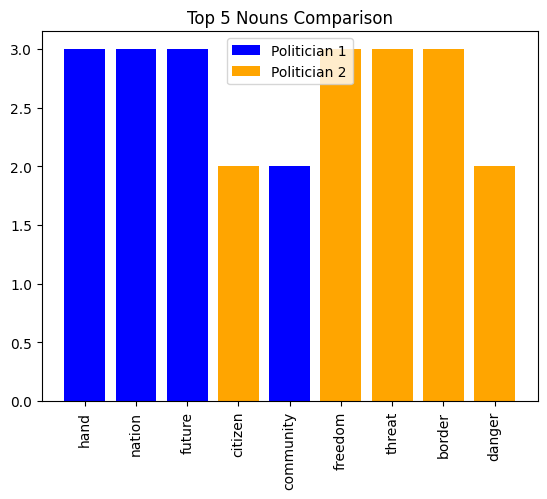

In [95]:
import pandas as pd

p1_nouns = extracted_nouns_corrected.most_common(5)
p2_nouns = extracted_nouns_corrected2.most_common(5)

df = pd.DataFrame({
    "Politician 1": [f"{w}: {c}" for w, c in p1_nouns],
    "Politician 2": [f"{w}: {c}" for w, c in p2_nouns]
})

print(df)

import matplotlib.pyplot as plt

words1 = [w for w, c in p1_nouns]
words2 = [w for w, c in p2_nouns]
p1_counts = [c for w, c in p1_nouns]
p2_counts = [c for w, c in p2_nouns]

plt.bar(words1, p1_counts, color='blue', label='Politician 1')
plt.bar(words2, p2_counts, color='orange', label='Politician 2')

plt.title("Top 5 Nouns Comparison")
plt.legend()
plt.xticks(rotation=90)
plt.show()


Iz grafa se moze promijetiti da prvi politicar koristi pozitivnije rijeci kao sto su: hand, nation, future, community, dok drugi politicar koristi negativnije rijeci poput threat i danger.

  Politician 1 Politician 2
0     build: 4    ensure: 4
1       let: 4    refuse: 3
2    choose: 3      face: 2
3     share: 2   protect: 2
4    invest: 2      seek: 2


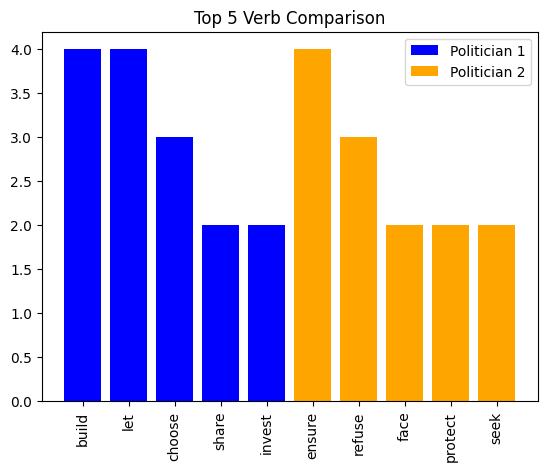

In [98]:
p1_verbs = extracted_verb_corrected.most_common(5)
p2_verbs = extracted_verb_corrected2.most_common(5)

df = pd.DataFrame({
    "Politician 1": [f"{w}: {c}" for w, c in p1_verbs],
    "Politician 2": [f"{w}: {c}" for w, c in p2_verbs]
})

print(df)


words1 = [w for w, c in p1_verbs]
words2 = [w for w, c in p2_verbs]
p1_counts = [c for w, c in p1_verbs]
p2_counts = [c for w, c in p2_verbs]

plt.bar(words1, p1_counts, color='blue', label='Politician 1')
plt.bar(words2, p2_counts, color='orange', label='Politician 2')

plt.title("Top 5 Verb Comparison")
plt.legend()
plt.xticks(rotation=90)
plt.show()

Iz prikaza najcesce koristenih glagola, moze se primijetiti da prvi politicar ponovno koristi pozitivnije rijeci kao sto su build, share, inverst. Drugi politicar ne koristi nuzno negativne rijeci, ali u usporedbi s prvim politicarom, zvuce manje uvjerljivo: refuse, face, seek.

    Politician 1  Politician 2
0         new: 2     fellow: 1
1      fellow: 1  uncertain: 1
2  unshakable: 1      armed: 1
3       great: 1       firm: 1
4      bright: 1    hostile: 1


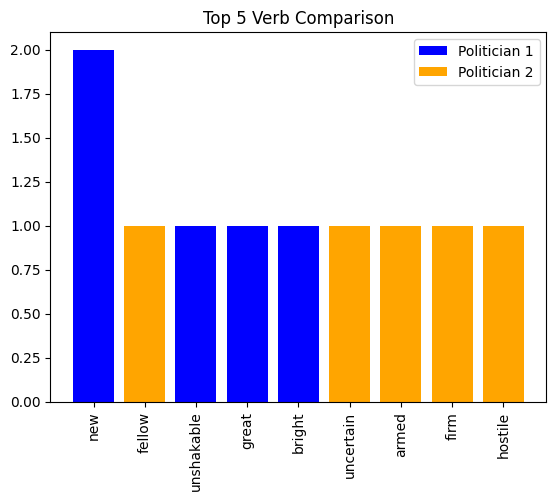

In [99]:
p1_adj = extracted_adj_corrected.most_common(5)
p2_adj = extracted_adj_corrected2.most_common(5)

df = pd.DataFrame({
    "Politician 1": [f"{w}: {c}" for w, c in p1_adj],
    "Politician 2": [f"{w}: {c}" for w, c in p2_adj]
})

print(df)


words1 = [w for w, c in p1_adj]
words2 = [w for w, c in p2_adj]
p1_counts = [c for w, c in p1_adj]
p2_counts = [c for w, c in p2_adj]

plt.bar(words1, p1_counts, color='blue', label='Politician 1')
plt.bar(words2, p2_counts, color='orange', label='Politician 2')

plt.title("Top 5 Verb Comparison")
plt.legend()
plt.xticks(rotation=90)
plt.show()

Iz prikaza najcesce koristenih pridjeva, takodjer se moze primijetiti da prvi politicar koristi pozitivnije rijeci: new, great, bright. Najcesci pridjevi koje koristi drugi politicar su uncertain, hostile, firm.

# Task
Extract the 5 most frequent nouns from `sport_doc` and `tech_doc` respectively, after lemmatizing and converting them to lowercase, and print the results for both.

## Extract nouns from sport text and count the 5 most frequent

### Subtask:
Extract all tokens with POS tag 'NOUN' from 'sport_doc', convert their lemmas to lowercase, count their occurrences using `Counter`, and print the 5 most common nouns.


**Reasoning**:
I need to extract nouns from the 'sport_doc', lemmatize them, convert to lowercase, count their occurrences, and then print the 5 most common nouns as per the instructions.



In [41]:
sport_nouns = []
for token in sport_doc:
    if token.pos_ == 'NOUN':
        sport_nouns.append(token.lemma_.lower())


# Count the occurrences of each noun
noun_counts = Counter(sport_nouns)

# Print the 5 most common nouns
print("5 most common nouns in sport text:")
for noun, count in noun_counts.most_common(5):
    print(f"{noun}: {count}")

5 most common nouns in sport text:
team: 8
match: 6
teamwork: 4
championship: 3
discipline: 2


## Extract nouns from tech text and count the 5 most frequent

### Subtask:
Extract all tokens with POS tag 'NOUN' from 'tech_doc', convert their lemmas to lowercase, count their occurrences using `Counter`, and print the 5 most common nouns.

#### Instructions
1. Initialize an empty list to store nouns from `tech_doc`.
2. Iterate through each token in `tech_doc`.
3. For each token, check if its Part-of-Speech (POS) tag is 'NOUN'.
4. If the token is a noun, append its lemmatized form (converted to lowercase) to the list created in step 1.
5. Use the `Counter` object from the `collections` module to count the occurrences of each noun in the list.
6. Print the 5 most common nouns and their counts using the `most_common()` method of the `Counter` object.

**Reasoning**:
Now I will implement the steps outlined in the previous markdown block to extract, lemmatize, lowercase, count, and print the 5 most common nouns from the `tech_doc`.



In [42]:
tech_nouns = []
for token in tech_doc:
    if token.pos_ == 'NOUN':
        tech_nouns.append(token.lemma_.lower())

# Count the occurrences of each noun
noun_counts_tech = Counter(tech_nouns)

# Print the 5 most common nouns
print("5 most common nouns in tech text:")
for noun, count in noun_counts_tech.most_common(5):
    print(f"{noun}: {count}")

5 most common nouns in tech text:
technology: 7
intelligence: 4
processing: 4
device: 3
software: 3


## Summary:

### Q&A
The 5 most frequent nouns from `sport_doc`, after lemmatizing and converting to lowercase, are:
*   `team`: 8 occurrences
*   `match`: 6 occurrences
*   `teamwork`: 4 occurrences
*   `championship`: 3 occurrences
*   `discipline`: 2 occurrences

The 5 most frequent nouns from `tech_doc`, after lemmatizing and converting to lowercase, are:
*   `technology`: 7 occurrences
*   `intelligence`: 4 occurrences
*   `processing`: 4 occurrences
*   `device`: 3 occurrences
*   `software`: 3 occurrences

### Data Analysis Key Findings
*   For the sport document, the most frequent nouns primarily revolve around team activities and competitive events, with 'team' appearing 8 times and 'match' 6 times.
*   For the technology document, the most frequent nouns clearly indicate a focus on advanced digital concepts and components, with 'technology' appearing 7 times and 'intelligence' and 'processing' both appearing 4 times.

### Insights or Next Steps
*   The lists of most frequent nouns effectively capture the core themes of each document, demonstrating that noun frequency analysis can be a quick way to understand document content.
*   A potential next step could involve performing a similar analysis on verbs or adjectives to gain a deeper understanding of actions and descriptions within these documents.
